# **Multiclass Classification**

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
import matplotlib.pyplot as plt

In [7]:
# remember number should be in similar range
# before started building ANN so it is converges faster
# now we converting image pixel in 0-1 range
X_train = X_train / 255
X_test = X_test / 255

In [8]:
model = Sequential()

# converting inputs into 1D using flatten like [][][] means in single row
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))#128 nodes -> hidden layers
# model.add(Dense(32, activation='relu'))#32 nodes -> hidden layers
model.add(Dense(10, activation='softmax'))#10 -> output nodes it's good to use softmax for multiple outputs

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics='accuracy') #in this loss function -> we do not need to do one hot encoding
# but categorical_crossentropy we do one hot encoding

In [11]:
# training the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2859 - accuracy: 0.9185 - val_loss: 0.1594 - val_accuracy: 0.9542
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1246 - accuracy: 0.9644 - val_loss: 0.1085 - val_accuracy: 0.9688
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0846 - accuracy: 0.9743 - val_loss: 0.0967 - val_accuracy: 0.9703
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0637 - accuracy: 0.9807 - val_loss: 0.0890 - val_accuracy: 0.9734
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0489 - accuracy: 0.9852 - val_loss: 0.0922 - val_accuracy: 0.9731
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0395 - accuracy: 0.9879 - val_loss: 0.0830 - val_accuracy: 0.9765
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0303 - accuracy: 0.9905 - val_loss: 0.0842 - val_accuracy:

In [12]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [13]:
y_pred = y_prob.argmax(axis=1)

In [14]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9793

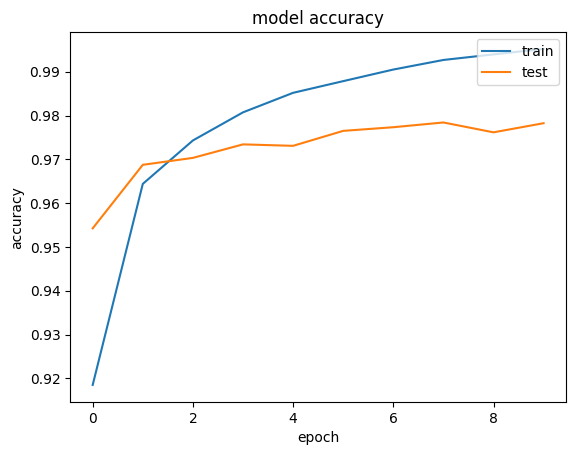

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

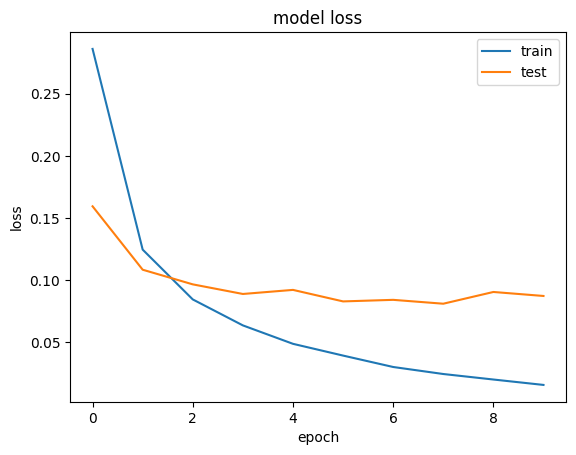

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

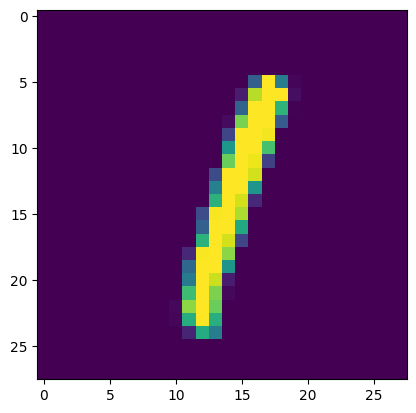

In [29]:
plt.imshow(X_test[5])

In [30]:
model.predict(X_test[5].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 25ms/step


array([1])